# 09. 워드 임베딩(Word Embedding)

- 각 단어를 인공 신경망 학습을 통해 벡터화

## 09-01 워드 임베딩(Word Embedding)

### 1. 희소 표현(Sparse Representation)
- 희소 벡터의 문제점
  - 단어의 개수가 늘어나면 벡터의 차원이 한없이 커짐
  - 벡터 표현은 공간적 낭비를 불러일으킴
  - ex) 원-핫 벡터, DTM

### 2. 밀집 표현(Dense Representation)
- 밀집 표현은 벡터의 차원을 단어 집합의 크기로 상정X
- 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤
- 0과 1뿐만 아닌 실수값을 가지게 됨
- 강아지의 희소표현
      강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0] # 이때 1 뒤의 0의 수는 9995개. 차원은 10,000
- 강아지의 벡터표현
      강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128
- 벡터의 차원이 조밀해졌다고 하여 밀집 벡터(dense vector)

### 3. 워드 임베딩(Word Embedding)
- 단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법
- 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터(embedding vector)
- 워드 임베딩 방법: LSA, Word2Vec, FastText, Glove 등

. | 원핫 백터 | 임베딩 벡터
--- | --- | ---
차원 | 고차원(단어 집합의 크기) | 저차원
다른 표현 | 희소 벡터의 일종 | 밀집 벡터의 일종
표현 방법 | 수동 | 훈련 데이터로부터 학습함
값의 타입 | 1과 0 | 실수

## 09-02 워드투벡터(Word2Vec)

- 원-핫 벡터는 단어 벡터 간 유의미한 유사도를 계산할 수 없다
-  워드투벡터(Word2Vec): 단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화 할 수 있는 방법

### 1. 희소 표현(Sparse Representation)
- 벡터 또는 행렬의 값이 대부분이 0으로 표현되는 방법
- 각 단어 벡터간 유의미한 유사성을 표현할 수 없다
- 대안으로 단어의 의미를 다차원 공간에 벡터화하는 방법을 사용 -> 분산 표현(distributed representation)

### 2. 분산 표현(Distributed Representation)
- 분포 가설(distributional hypothesis)이라는 가정 하에 만들어진 표현 방법
  - 분포 가설: '비슷한 문맥에서 등장하는 단어들은 비슷한 의미를 가진다'
- 분산 표현은 분포 가설을 이용하여 텍스트를 학습하고, 단어의 의미를 벡터의 여러 차원에 분산하여 표현
- 희소 표현이 고차원에 각 차원이 분리된 표현 방법
- 분산 표현은 저차원에 단어의 의미를 여러 차원에다가 분산 하여 표현
- 단어 벡터 간 유의미한 유사도를 계산 가능
- Word2Vec가 대표적인 학습방법

### 3. CBOW(Continuous Bag of Words)
- 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법

> 예문 : "The fat cat sat on the mat"

- ['The', 'fat', 'cat', 'on', 'the', 'mat']으로부터 sat을 예측
- 중심 단어(center word): 예측해야하는 단어 sat
- 주변 단어(context word): 예측에 사용되는 단어들
- 윈도우: 중심 단어를 예측하기 위해서 앞, 뒤로 몇개의 단어를 볼지 결정할때, 그 범위
- 윈도우 크기가 n이라고 한다면, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n

![img](https://wikidocs.net/images/page/22660/%EB%8B%A8%EC%96%B4.PNG)
- 슬라이딩 윈도우(sliding window): 윈도우를 옆으로 움직여서 주변 단어와 중심 단어의 선택을 변경해가며 학습을 위한 데이터 셋을 만드는 방법
- Word2Vec에서 입력은 모두 원-핫 벡터가 되어야 함
- CBOW의 인공 신경망을 간단히 도식화
  ![img](https://wikidocs.net/images/page/22660/word2vec_renew_1.PNG)
  - 입력층(Input layer)의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층(Output layer)에서 예측하고자 하는 중간 단어의 원-핫 벡터가 레이블로서 필요
  - Word2Vec은 은닉층이 1개인 얕은 신경망(shallow neural network)
  - 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 투사층(projection layer)이라고 부르기도 함
- CBOW의 인공 신경망을 좀 더 확대
  ![img](https://wikidocs.net/images/page/22660/word2vec_renew_2.PNG)
  - CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원이 됨
  - 입력층과 투사층 사이의 가중치 W는 V × M 행렬
  - 투사층에서 출력층사이의 가중치 W'는 M × V 행렬
  - 두 행렬은 동일한 행렬을 전치(transpose)한 것이 아니라, 서로 다른 행렬
  - 훈련 전에 이 가중치 행렬 W와 W'는 랜덤 값을 가짐
  - CBOW는 주변 단어로 중심 단어를 더 정확히 맞추기 위해 계속해서 이 W와 W'를 학습해가는 구조

- 입력으로 들어오는 주변 단어의 원-핫 벡터와 가중치 W행렬의 곱 도식화
  ![img](https://wikidocs.net/images/page/22660/word2vec_renew_3.PNG)
  - 입력 벡터는 원-핫 벡터
  - 입력 벡터와 가중치 W 행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것과(lookup) 동일 = 룩업테이블
  - CBOW의 목적은 W와 W'를 잘 훈련시키는 것
    - 이유: 여기서 lookup해온 W의 각 행벡터가 Word2Vec 학습 후에는 각 단어의 M차원의 임베딩 벡터로 간주되기 때문

- 이렇게 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과
  ![img](https://wikidocs.net/images/page/22660/word2vec_renew_4.PNG)
  - 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구함
  - 만약 윈도우 크기 n=2라면, 입력 벡터의 총 개수는 2n이므로 중간 단어를 예측하기 위해서는 총 4개가 입력 벡터로 사용
  - 투사층에서 벡터의 평균을 구하는 부분은 CBOW가 Skip-Gram과 다른 차이점

- 이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해짐
![img](https://wikidocs.net/images/page/22660/word2vec_renew_5.PNG)
- 곱셈의 결과로는 원-핫 벡터들과 차원이 V로 동일한 벡터가 나옴
- CBOW는 소프트맥스(softmax) 함수를 지나면서 벡터의 각 원소들의 값은 0과 1사이의 실수로, 총 합은 1
- 중심 단어의 원-핫 벡터를 $y$로 했을 때, 이 두 벡터값의 오차를 줄이기위해 CBOW는 손실 함수(loss function)로 크로스 엔트로피(cross-entropy) 함수를 사용
- 크로스 엔트로피 함수에 중심 단어인 원-핫 벡터와 스코어 벡터를 입력값으로 넣고, 이를 식으로 표현
$$cost(\hat{𝑦}, y) = -\sum_{j=1}^{V}y_{j}\ log(\hat{𝑦_{j}})$$
- 역전파(Back Propagation)를 수행하면 W와 W'가 학습
- M차원의 크기를 갖는 W의 행렬의 행을 각 단어의 임베딩 벡터로 사용하거나 W와 W' 행렬 두 가지 모두를 가지고 임베딩 벡터를 사용

### 4. Skip-gram
- 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법
- 윈도우 크기=2, 데이터 셋 구성
  ![img](https://wikidocs.net/images/page/22660/skipgram_dataset.PNG)
- 인공신경망 도식화
  ![img](https://wikidocs.net/images/page/22660/word2vec_renew_6.PNG)
- 투사층에서 벡터들의 평균을 구하는 과정X
- 여러 논문에서 성능 비교를 진행했을 때 전반적으로 Skip-gram이 CBOW보다 성능이 좋다

### 5. NNLM Vs. Word2Vec
![img](https://wikidocs.net/images/page/22660/word2vec_renew_7.PNG)
- n을 학습에 사용하는 단어의 수, m을 임베딩 벡터의 차원, h를 은닉층의 크기, V를 단어 집합의 크기
- NNLM은 단어 벡터 간 유사도를 구할 수 있도록 워드 임베딩의 개념을 도입
- Word2Vec: 워드 임베딩 자체에 집중하여 NNLM의 느린 학습 속도와 정확도를 개선하여 탄생
- NNLM은 다음 단어를 예측하는 언어 모델이 목적이므로 다음 단어를 예측
- Word2Vec(CBOW)은 워드 임베딩 자체가 목적이므로 다음 단어가 아닌 중심 단어를 예측하게 하여 학습
- NNLM이 예측 단어의 이전 단어들만을 참고
- Word2Vec은 예측 단어의 전, 후 단어들을 모두 참고
- Word2Vec이 NNLM보다 학습 속도에서 강점을 가지는 이유
  - 은닉층 제거
  - 소프트맥스와 네거티브 샘플링같은 추가적으로 사용되는 기법
- NNLM: $(n × m) + (n × m × h) + (h × V)$
- Word2Vec: $(n × m) + (m × log(V))$



## 09-03 영어/한국어 Word2Vec 실습

In [9]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

### 1. 영어 Word2Vec 만들기
#### (1) 훈련 데이터 이해하기

In [10]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x193adb70d30>)

#### (2) 훈련 데이터 전처리하기

In [11]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YOORA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [13]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [14]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


#### (3) Word2Vec 훈련시키기

In [17]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram.
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [18]:
# man과 유사한 단어 출력
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.8441445827484131), ('guy', 0.8274192214012146), ('lady', 0.7722979784011841), ('gentleman', 0.7410231828689575), ('boy', 0.7357403635978699), ('soldier', 0.7350995540618896), ('girl', 0.7287259697914124), ('rabbi', 0.6910779476165771), ('kid', 0.6831039190292358), ('david', 0.663507342338562)]


#### (4) Word2Vec 모델 저장하고 로드하기

In [19]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [20]:
# man과 유사한 단어 출력
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.8441445827484131), ('guy', 0.8274192214012146), ('lady', 0.7722979784011841), ('gentleman', 0.7410231828689575), ('boy', 0.7357403635978699), ('soldier', 0.7350995540618896), ('girl', 0.7287259697914124), ('rabbi', 0.6910779476165771), ('kid', 0.6831039190292358), ('david', 0.663507342338562)]


### 2. 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm

In [22]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x193adb70fd0>)

In [23]:
train_data = pd.read_table('ratings.txt')

In [24]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [25]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [26]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [27]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [28]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [29]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [30]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [31]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████| 199992/199992 [08:59<00:00, 371.01it/s]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


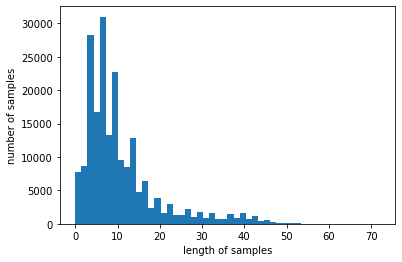

In [32]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [34]:
from gensim.models import Word2Vec

# Word2Vec으로 토큰화 된 네이버 영화 리뷰 데이터 학습
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [35]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [36]:
print(model.wv.most_similar("최민식"))

[('한석규', 0.8581089377403259), ('송강호', 0.8570764660835266), ('윤제문', 0.8477233052253723), ('서영희', 0.8421652913093567), ('류덕환', 0.8383586406707764), ('김수현', 0.836716890335083), ('안성기', 0.8350959420204163), ('박중훈', 0.8318821787834167), ('이정재', 0.8314324617385864), ('문소리', 0.8308103084564209)]


In [37]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8643483519554138), ('호러', 0.8476483225822449), ('무협', 0.8456701040267944), ('물의', 0.8381571769714355), ('정통', 0.8339495062828064), ('느와르', 0.8298413753509521), ('무비', 0.8216230273246765), ('블랙', 0.8113743662834167), ('블록버스터', 0.8083066940307617), ('물', 0.7811896800994873)]


### 3. 사전 훈련된 Word2Vec 임베딩(Pre-trained Word2Vec embedding) 소개

In [43]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드.
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [44]:
# 모델 크기 확인
print(word2vec_model.vectors.shape)

(3000000, 300)


In [45]:
# 두 단어간 유사도 계산
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

0.40797037
0.057204384


In [46]:
# book의 벡터
print(word2vec_model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

- Word2vec는 최근에 들어서는 자연어 처리를 넘어서 추천 시스템에도 사용되고 있는 모델
- 적당하게 데이터를 나열해주면 Word2vec은 위치가 근접한 데이터를 유사도가 높은 벡터를 만들어준다는 점에서 착안

## 09-04 네거티브 샘플링을 이용한 Word2Vec 구현(Skip-Gram with Negative Sampling, SGNS)

### 1. 네거티브 샘플링(Negative Sampling)

- 단어 집합의 크기가 수만 이상에 달한다면 Word2Vec은 꽤나 학습하기에 무거운 모델
- 만약 현재 집중하고 있는 중심 단어와 주변 단어가 '강아지'와 '고양이', '귀여운'과 같은 단어라면, 사실 이 단어들과 별 연관 관계가 없는 '돈가스'나 '컴퓨터'와 같은 수많은 단어의 임베딩 벡터값까지 업데이트하는 것은 비효율적
- 네거티브 샘플링은 Word2Vec이 학습 과정에서 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있도록 하는 방법
- 주변 단어들을 긍정(positive), 랜덤으로 샘플링 된 단어들을 부정(negative)으로 레이블링
- 다중 클래스 분류 문제를 풀던 Word2Vec보다 훨씬 연산량에서 효율적

### 2. 네거티브 샘플링 Skip-Gram(Skip-Gram with Negative Sampling, SGNS)
- Skip-gram은 중심 단어로부터 주변 단어를 예측하는 모델
- SGNS (Skip-Gram with Negative Sampling): 중심 단어와 주변 단어가 모두 입력이 되고, 이 두 단어가 실제로 윈도우 크기 내에 존재하는 이웃 관계인지 그 확률을 예측
  ![img](https://wikidocs.net/images/page/69141/%EA%B7%B8%EB%A6%BC1-2.PNG)
- 기존의 Skip-gram 데이터셋을 SGNS의 데이터셋으로 바꾸는 과정
  ![img](https://wikidocs.net/images/page/69141/%EA%B7%B8%EB%A6%BC3.PNG)
  ![img](https://wikidocs.net/images/page/69141/%EA%B7%B8%EB%A6%BC4.PNG)
- 두 테이블 중 하나는 입력 1인 중심 단어의 테이블 룩업을 위한 임베딩 테이블이고, 하나는 입력 2인 주변 단어의 테이블 룩업을 위한 임베딩 테이블
  ![img](https://wikidocs.net/images/page/69141/%EA%B7%B8%EB%A6%BC5.PNG)
- 각 단어는 각 임베딩 테이블을 테이블 룩업하여 임베딩 벡터로 변환
  ![img](https://wikidocs.net/images/page/69141/%EA%B7%B8%EB%A6%BC6.PNG)
- 그 후의 연산 도식화
  ![img](https://wikidocs.net/images/page/69141/%EA%B7%B8%EB%A6%BC7.PNG)
- 중심 단어와 주변 단어의 내적값을 이 모델의 예측값으로 하고, 레이블과의 오차로부터 역전파하여 중심 단어와 주변 단어의 임베딩 벡터값을 업데이트
- 학습 후에는 좌측의 임베딩 행렬을 임베딩 벡터로 사용할 수도 있고, 두 행렬을 더한 후 사용하거나 두 행렬을 연결(concatenate)해서 사용

### 3. 20뉴스그룹 데이터 전처리하기

In [47]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [48]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [49]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [50]:
news_df.isnull().values.any()

False

In [51]:
news_df.replace("", float("NaN"), inplace=True)
news_df.isnull().values.any()

True

In [52]:
news_df.dropna(inplace=True)
print('총 샘플 수 :',len(news_df))

총 샘플 수 : 10995


In [53]:
# 불용어를 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [54]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


C:\Users\YOORA\anaconda3\lib\site-packages\numpy\lib\function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [55]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [56]:
# 상위 2개 샘플 출력
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [57]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


### 4. 네거티브 샘플링을 통한 데이터셋 구성하기

In [58]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

In [59]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(away (178), photographic (11883)) -> 0
(soldiers (957), government (51)) -> 1
(guilt (4989), makes (228)) -> 1
(least (87), atrocities (4406)) -> 1
(think (6), whole (217)) -> 1


In [60]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [61]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


In [62]:
# 모든 뉴스그램 샘플에 대해 수행
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

### 5. Skip-Gram with Negative Sampling(SGNS) 구현하기

In [63]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [64]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

In [65]:
dot_product = Dot(axes=2)([word_embedding, context_embedding]) # 임베딩 테이블 거쳐
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product) # 내적 수행
output = Activation('sigmoid')(dot_product) # 1 또는 0 예측위해 시그모이드 함수를 활성함수로 거침

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 100)       6427700     ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 100)       6427700     ['input_2[0][0]']                
                                                                                              

In [66]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 4628.104959990829
Epoch : 2 Loss : 3670.1999233383685
Epoch : 3 Loss : 3505.9810983911157
Epoch : 4 Loss : 3299.0470939371735
Epoch : 5 Loss : 3076.3892320385203


### 6. 결과 확인하기

In [70]:
import gensim


word_vector_dim = 100
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, word_vector_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 모델 로드
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [71]:
w2v.most_similar(positive=['soldiers'])

[('wounded', 0.8347063660621643),
 ('massacred', 0.8222216367721558),
 ('massacre', 0.819659411907196),
 ('fighting', 0.805019199848175),
 ('fleeing', 0.8028205037117004),
 ('seized', 0.8001793026924133),
 ('journalists', 0.797465980052948),
 ('azerbaijan', 0.7973578572273254),
 ('bloodshed', 0.793043851852417),
 ('agdam', 0.7881282567977905)]

In [72]:
w2v.most_similar(positive=['doctor'])

[('diseases', 0.6267575621604919),
 ('disease', 0.5989144444465637),
 ('distinguish', 0.5674646496772766),
 ('urgent', 0.5670287609100342),
 ('kidney', 0.5635044574737549),
 ('infections', 0.562086284160614),
 ('cure', 0.5605250597000122),
 ('treatment', 0.5570876598358154),
 ('clinic', 0.5531479120254517),
 ('whereever', 0.552707850933075)]

In [73]:
w2v.most_similar(positive=['police'])

[('enforcement', 0.646109938621521),
 ('officers', 0.6386284232139587),
 ('approval', 0.621131181716919),
 ('engaged', 0.616640567779541),
 ('armed', 0.6085821986198425),
 ('protest', 0.6015961170196533),
 ('carried', 0.5965606570243835),
 ('defend', 0.5928326845169067),
 ('filed', 0.5898779034614563),
 ('deaths', 0.5898562073707581)]

In [74]:
w2v.most_similar(positive=['knife'])

[('molesting', 0.6993469595909119),
 ('inflicted', 0.6978085041046143),
 ('burned', 0.6807896494865417),
 ('inflicting', 0.6794626116752625),
 ('aggravated', 0.6759436130523682),
 ('ultimate', 0.6695354580879211),
 ('survival', 0.6629530787467957),
 ('dying', 0.6624512076377869),
 ('justification', 0.6577073335647583),
 ('murders', 0.6518142819404602)]

In [75]:
w2v.most_similar(positive=['engine'])

[('cylinder', 0.5639626979827881),
 ('mower', 0.5057182312011719),
 ('trunk', 0.49492892622947693),
 ('honda', 0.47876763343811035),
 ('tires', 0.4778628945350647),
 ('brakes', 0.47401198744773865),
 ('sensor', 0.47233036160469055),
 ('exterior', 0.47230878472328186),
 ('valve', 0.46208059787750244),
 ('brake', 0.46173378825187683)]

## 09-05 글로브(GloVe)
- 글로브(Global Vectors for Word Representation, GloVe)는 카운트 기반과 예측 기반을 모두 사용하는 방법

### 1. 기존 방법론에 대한 비판
- LSA는 카운트 기반으로 코퍼스의 전체적인 통계 정보를 고려하기는 하지만 유추 작업(Analogy task)에는 성능이 떨어짐
- Word2Vec는 예측 기반으로 단어 간 유추 작업에는 LSA보다 뛰어나지만, 임베딩 벡터가 윈도우 크기 내에서만 주변 단어를 고려하기 때문에 코퍼스의 전체적인 통계 정보를 반영하지 못함

### 2. 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)
- 단어의 동시 등장 행렬: 행과 열을 전체 단어 집합의 단어들로 구성하고, i 단어의 윈도우 크기(Window Size) 내에서 k 단어가 등장한 횟수를 i행 k열에 기재한 행렬

>I like deep learning
I like NLP
I enjoy flying

카운트|I|like|enjoy|deep|learning|NLP|flying
--- | --- | ---|---|---|---|---|---
I|0|2|1|0|0|0|0
like|2|0|0|1|0|1|0
enjoy|1|0|0|0|0|0|1
deep|0|1|0|0|1|0|0
learning|0|0|0|1|0|0|0
NLP|0|1|0|0|0|0|0
flying|0|0|1|0|0|0|0

- 행렬을 전치(Transpose)해도 동일한 행렬이 된다
- 이유는 i 단어의 윈도우 크기 내에서 k 단어가 등장한 빈도는 반대로 k 단어의 윈도우 크기 내에서 i 단어가 등장한 빈도와 동일하기 때문

### 3. 동시 등장 확률(Co-occurrence Probability)
- 동시 등장 확률 $P(k\ |\ i)$는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률
- $P(k\ |\ i)$에서 i를 중심 단어(Center Word), k를 주변 단어(Context Word)라고 했을 때, 위에서 배운 동시 등장 행렬에서 중심 단어 i의 행의 모든 값을 더한 값을 분모로 하고 i행 k열의 값을 분자로 한 값

동시 등장 확률과 크기 관계 비(ratio)|k=solid|k=gas|k=water|k=fasion
--|---|---|---|---
P(k l ice)|0.00019|0.000066|0.003|0.000017
P(k l steam)|0.000022|0.00078|0.0022|0.000018
P(k l ice) / P(k l steam)|8.9|0.085|1.36|0.96


동시 등장 확률과 크기 관계 비(ratio) | k=solid | k=gas | k=water | k=fasion |
------|------|------|------|----
P(k l ice) | 큰 값 | 작은 값 | 큰 값 | 작은 값 
P(k l steam) | 작은 값 | 큰 값 | 큰 값 | 작은 값 
P(k l ice) / P(k l steam) | 큰 값 | 작은 값 | 1에 가까움 | 1에 가까움 

### 4. 손실 함수(Loss function)
- 손실함수 용어
  - $X$: 동시 등장 행렬(Co-occurrence Matrix)
  - $X_ij$: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 j가 등장하는 횟수
  - $X_i$: $X_{i}: \sum_j X_{ij}$ 동시 등장 행렬에서 i행의 값을 모두 더한 값
  - $P_{ik}$: $P(k\ |\ i)$=$\frac{X_{ik}}{X_{i}}$: 중심 단어 i가 등장했을 때 윈도우 내 주변 단어 k가 등장할 확률
        Ex) P(solid l ice) = 단어 ice가 등장했을 때 단어 solid가 등장할 확률
 
  - $\frac{P_{ik}}{P_{jk}}$: $P_ij$를 $P_jk$로 나눠준 값
  - $w_{i}$ : 중심 단어 i의 임베딩 벡터
  - $\tilde{w_{k}}$ : 주변 단어 k의 임베딩 벡터

- GloVe: '임베딩 된 중심 단어와 주변 단어 벡터의 내적이 전체 코퍼스에서의 동시 등장 확률이 되도록 만드는 것'
- 식: $dot\ product(w_{i}\ \tilde{w_{k}}) \approx\ P(k\ |\ i) = P_{ik}$
- 더 정확한 버전: $dot\ product(w_{i}\ \tilde{w_{k}}) \approx\ log\ P(k\ |\ i) = log\ P_{ik}$

- 벡터 $w_{i}, w_{j}, \tilde{w_{k}}$를 가지고 어떤 함수 $F$를 수행하면, $P_{ik} / P_{jk}$가 나온다는 초기 식으로부터 전개를 시작합니다.
$$F(w_{i},\ w_{j},\ \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$
- 두 단어 사이의 동시 등장 확률의 크기 관계 비(ratio) 정보를 벡터 공간에 인코딩하는 것이 목적 ->  $w_{i}$와 $w_{j}$라는 두 벡터의 차이를 함수 $F$의 입력으로 사용
$$F(w_{i} -\ w_{j},\ \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$
- 우변은 스칼라값이고 좌변은 벡터값 -> 두 입력에 내적(Dot product)을 수행
$$F((w_{i} -\ w_{j})^{T} \tilde{w_{k}}) = \frac{P_{ik}}{P_{jk}}$$
- $a$와 $b$에 대해서 함수 $F$가 $F(a + b)$과 $F(a)F(b)$와 같도록 만족시켜야 한다
$$F((w_{i} -\ w_{j})^{T} \tilde{w_{k}}) = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$
- 우변은 본래 $\frac{P_{ik}}{P_{jk}}$
$$\frac{P_{ik}}{P_{jk}} = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$
$$F(w_{i}^{T}\tilde{w_{k}}) = P_{ik} = \frac{X_{ik}}{X_{i}}$$
- 좌변 풀어쓰면 준동형식 형태와 일치
$$F(w_{i}^{T}\tilde{w_{k}}\ -\ w_{j}^{T}\tilde{w_{k}}) = \frac{F(w_{i}^{T}\tilde{w_{k}})}{F(w_{j}^{T}\tilde{w_{k}})}$$
- $F$를 지수함수 $exp$라고 가정
$$exp(w_{i}^{T}\tilde{w_{k}}\ -\ w_{j}^{T}\tilde{w_{k}}) = \frac{exp(w_{i}^{T}\tilde{w_{k}})}{exp(w_{j}^{T}\tilde{w_{k}})}$$
$$exp(w_{i}^{T}\tilde{w_{k}}) = P_{ik} = \frac{X_{ik}}{X_{i}}$$
$$w_{i}^{T}\tilde{w_{k}} = log\ P_{ik} = log\ (\frac{X_{ik}}{X_{i}}) = log\ X_{ik} - log\ X_{i}$$
- 사실 $w_{i}$와 $\tilde{w_{k}}$는 두 값의 위치를 서로 바꾸어도 식이 성립해야함 그런데 $log X_i$ 때문에 불가능. 그래서 $log X_i$를 $w_{i}$에 대한 편향 $b_i$로 대체, 같은 이유로 $\tilde{w_{k}}$에 대한 편향 $\tilde{b_{k}}$ 추가
$$w_{i}^{T}\tilde{w_{k}} + b_{i} + \tilde{b_{k}} = log\ X_{ik}$$
- 일반화
$$Loss\ function = \sum_{m, n=1}^{V}\ (w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$$
- 문제점: $X$는 희소 행렬일 가능성이 많아 많은 값이 0이거나 작은 수치를 가지는 경우가 많아서 정보에 도움이 거의 안되는것
- 가중치 함수 $f(X_{ik})$ 도입 결정
- GloVe에 도입되는 $f(X_{ik})$의 그래프
    ![img](https://wikidocs.net/images/page/22885/%EA%B0%80%EC%A4%91%EC%B9%98.PNG)
    $$f(x) = min(1,\ (x/x_{max})^{3/4})$$
#### 최종 결과
$$Loss\ function = \sum_{m, n=1}^{V}\ f(X_{mn})(w_{m}^{T}\tilde{w_{n}} + b_{m} + \tilde{b_{n}} - logX_{mn})^{2}$$

### 5. GloVe 훈련시키기

In [77]:
from glove import Corpus, Glove

corpus = Corpus() 

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
corpus.fit(result, window=5)
glove = Glove(no_components=100, learning_rate=0.05)

# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [78]:
print(glove.most_similar("man"))

[('woman', 0.965642635704228), ('guy', 0.8818846786899934), ('young', 0.8492653940396951), ('girl', 0.8448309518871022)]


In [79]:
print(glove.most_similar("boy"))

[('girl', 0.9382888790998231), ('kid', 0.8444211467408833), ('woman', 0.8319182370838567), ('man', 0.8213725355993369)]


In [80]:
print(glove.most_similar("university"))

[('harvard', 0.8789251656902284), ('mit', 0.8441173702232837), ('stanford', 0.8397840652897561), ('cambridge', 0.834619116606352)]


In [81]:
print(glove.most_similar("water"))

[('fresh', 0.8374100150581377), ('clean', 0.8373212141854532), ('air', 0.8354257431936553), ('electricity', 0.8212560260502819)]


## 09-06 패스트텍스트(FastText)
- 메커니즘 자체는 Word2Vec의 확장
- Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면, FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주
- 서브워드(subword)를 고려하여 학습

### 1. 내부 단어(subword)의 학습
- FastText에서는 각 단어는 글자 단위 n-gram의 구성으로 취급
```python
# apple일때, n = 3인 경우
<ap, app, ppl, ple, le> 
# 특별 토큰
<apple>
# 최종 6개의토큰을 백터화
<ap, app, ppl, ple, le>, <apple>
```


- 실제로 n의 범위 설정 가능, 기본값으로 최소값은 3 최대값은 6임


```python
# n = 3 ~ 6인 경우
<ap, app, ppl, ppl, le>, <app, appl, pple, ple>, <appl, pple>, ..., <apple>

```

- apple의 벡터값 = 저 위 벡터값들의 총 합
```python
apple = <ap + app + ppl + ppl + le> + <app + appl + pple + ple> + <appl + pple> + , ..., +<apple>
```

### 2. 모르는 단어(Out Of Vocabulary, OOV)에 대한 대응
- FastText의 인공 신경망을 학습한 후에는 데이터 셋의 모든 단어의 각 n-gram에 대해서 워드 임베딩이 됨
- 데이터 셋만 충분한다면 위와 같은 내부 단어(Subword)를 통해 모르는 단어(Out Of Vocabulary, OOV)에 대해서도 다른 단어와의 유사도를 계산할 수 있다
- 모르는 단어에 제대로 대처할 수 없는 Word2Vec, GloVe와는 다른 점입니다.

### 3. 단어 집합 내 빈도 수가 적었던 단어(Rare Word)에 대한 대응
- Word2Vec의 경우에는 등장 빈도 수가 적은 단어(rare word)에 대해서는 임베딩의 정확도가 높지 않다는 단점
- FastText의 경우, 만약 단어가 희귀 단어라도, 그 단어의 n-gram이 다른 단어의 n-gram과 겹치는 경우라면, Word2Vec과 비교하여 비교적 높은 임베딩 벡터값을 얻음
- FastText가 노이즈가 많은 코퍼스에서 강점을 가진 것 또한 이와 같은 이유
- 오타가 섞인 단어는 당연히 등장 빈도수가 매우 적으므로 일종의 희귀 단어가 됨
-  Word2Vec에서는 오타가 섞인 단어는 임베딩이 제대로 되지 않지만 FastText는 이에 대해서도 일정 수준의 성능을 보임

### 4. 실습으로 비교하는 Word2Vec Vs. FastText

#### (1) Word2Vec

- Word2Vec에 <code>model.wv.most_similar("electrofishing")</code>를 실행시키면 에러가 남
- 학습데이터에 존재하지 않는 단어이기 때문

#### (2) FastText

In [85]:
from gensim.models import FastText

model = FastText(result, vector_size=100, window=5, min_count=5, workers=4, sg=1)

In [86]:
model.wv.most_similar("electrofishing")

[('electrolux', 0.8675945401191711),
 ('electrolyte', 0.8651359677314758),
 ('electroshock', 0.8496968150138855),
 ('electro', 0.848720133304596),
 ('airbus', 0.844984233379364),
 ('electroencephalogram', 0.8342425227165222),
 ('airbag', 0.8327880501747131),
 ('electrochemical', 0.826180100440979),
 ('electrogram', 0.819739043712616),
 ('electron', 0.8172501921653748)]

### 5. 한국어에서의 FastText

#### (1) 음절 단위
- 예를 들어서 음절 단위의 임베딩의 경우에 n=3일때 ‘자연어처리’라는 단어에 대해 n-gram을 만들어보면 다음과 같음

```
<자연, 자연어, 연어처, 어처리, 처리>
```

#### (2) 자모 단위
- 자모 단위(초성, 중성, 종성 단위)로 임베딩하는 시도
- 자모 단위로 가게 되면 오타나 노이즈 측면에서 더 강한 임베딩을 기대
- 자연어 처리 분리 결과
    ```
    분리된 결과 : ㅈ ㅏ _ ㅇ ㅕ ㄴ ㅇ ㅓ _ ㅊ ㅓ _ ㄹ ㅣ _

    ```
- 분리된 결과에 n=3, n-gram 적용
    ```
    < ㅈ ㅏ, ㅈ ㅏ _, ㅏ _ ㅇ, ... 중략>
    ```